<a href="https://colab.research.google.com/github/Segrey372017/gb_python_datascience_libs_p2/blob/main/hw2_ssmirnov_dslibs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Домашняя работа к Уроку2  Анализ данных и проверка статистических гипотез

### Задание 1

В чём различие между зависимыми и независимыми выборками?

Независимость выборок один из основных критериев качественного статистического исследования, позволяющий сделать достоверные выводы об исследуемой генеральной совокупности. <br>
При обеспечении независимости выборок, какая-либо из выборок не оказывает влияния на остальные выборки, тоесть ключевые параметры выборок: характер распределения наблюдаемой величины, среднее и дисперсия не подвержены изменению из-за экземпляров, попавших в выборки. <br> 
Пример независимых выборок: по конвейеру идут детали - контролер каждый час снимает 5 деталей для проведения испытаний; из перетасованной колоды достали пять раз по три карты. <br>
Пример зависимых выборок: Группа студентов принмала участие в социологическом опросе, через несколько дней часть студентов из этой группы приняли участие в аналогичном опросе. В козине лежат 20 зеленых яблок и 10 красных, из корзины берут 5 яблок, фиксируют их цвета и возвращают в корзину, опыт повторяется несколько раз.

In [2]:
# Примеры выборок
rnd = np.random.RandomState(42) # вопспроизводимый генератор случайных чисел
general = np.array(rnd.randint(1,10, size = 300,)) # генеральная совокупность
general

array([7, 4, 8, 5, 7, 3, 7, 8, 5, 4, 8, 8, 3, 6, 5, 2, 8, 6, 2, 5, 1, 6,
       9, 1, 3, 7, 4, 9, 3, 5, 3, 7, 5, 9, 7, 2, 4, 9, 2, 9, 5, 2, 4, 7,
       8, 3, 1, 4, 2, 8, 4, 2, 6, 6, 4, 6, 2, 2, 4, 8, 7, 9, 8, 5, 2, 5,
       8, 9, 9, 1, 9, 7, 9, 8, 1, 8, 8, 3, 1, 8, 3, 3, 1, 5, 7, 9, 7, 9,
       8, 2, 1, 7, 7, 8, 5, 3, 8, 6, 3, 1, 3, 5, 3, 1, 5, 7, 7, 9, 3, 7,
       1, 4, 4, 5, 7, 7, 4, 7, 3, 6, 2, 9, 5, 6, 4, 7, 9, 7, 1, 1, 9, 9,
       4, 9, 3, 7, 6, 8, 9, 5, 1, 3, 8, 6, 8, 9, 4, 1, 1, 4, 7, 2, 3, 1,
       5, 1, 8, 1, 1, 2, 2, 6, 7, 5, 1, 1, 3, 2, 5, 6, 7, 4, 7, 8, 1, 6,
       8, 5, 4, 2, 6, 6, 1, 9, 6, 3, 4, 4, 3, 3, 3, 4, 7, 4, 9, 1, 8, 7,
       2, 8, 1, 9, 9, 2, 7, 3, 7, 9, 4, 1, 2, 1, 5, 5, 7, 9, 9, 3, 3, 3,
       4, 8, 6, 8, 1, 8, 4, 1, 8, 4, 6, 8, 4, 3, 9, 3, 9, 2, 2, 2, 6, 3,
       9, 4, 1, 4, 1, 5, 4, 8, 8, 7, 3, 1, 1, 3, 6, 7, 6, 6, 6, 3, 6, 8,
       2, 5, 1, 1, 5, 3, 4, 3, 1, 1, 5, 6, 3, 9, 5, 8, 1, 5, 3, 1, 4, 5,
       7, 1, 3, 2, 9, 6, 3, 8, 8, 2, 6, 7, 2, 2])

In [3]:
# среднее и стандарное отклонение генеральной совокупности
print('Среднее ', general.mean())
print('Стандартное отклонение ', general.std(ddof = 0))

Среднее  4.92
Стандартное отклонение  2.644541548170495


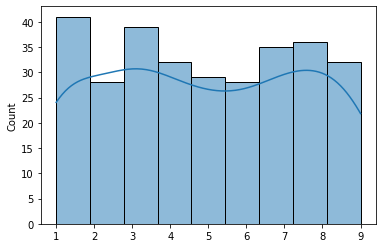

In [5]:
# Поскольу случайная генеральная совокупность задана равномерным распределением вероятность появления чисел в выборке примерно одинакова 
# Выведем гистограмму генеральной совокупности
sns.histplot(general, kde = True, bins = 9)

In [10]:
# независимые выборки
ind_choice = rnd.choice(general, size = (40,7), replace = False) # берем 40 выборок по 7 значений ранее отобранные элементы в выборку не попадут
ind_choice.mean(axis = 1).mean() # средние по столбцам и среднее выборочное

4.914285714285715

In [11]:
ind_choice.std(axis = 1).std() # дисперсия по столбцам выборочная дисперсия

0.48518196206219827

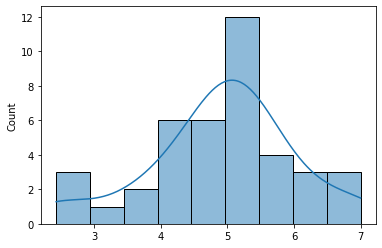

In [15]:
# В соответсвии со следствием Центральной предельной теоремы выборочное среднее будет стремится к средней генеральной совокумности
# При этом распределение выборочных средних должно стремится к нормальному распределению (колоколообразная кривая), дисперсия будет стремится к дисперсии генеральной сопокупности
# деленной на квадратный корень из размера выборки
sns.histplot(ind_choice.mean(axis = 1), kde = True, bins = 9)

In [13]:
# зависимые выборки
dpn_choice = rnd.choice(general, size = (40,7), replace = True ) # 40 выборок по 7, но один и тотже элемент может попасть в несколько выборок наравне с другими
dpn_choice.mean(axis = 1).mean() # средние по столбцам среднее выборочное

5.107142857142857

In [17]:
dpn_choice.std(axis = 1).std() # дисперсия по столбцам выборочная дисперсия

0.5723965103857005

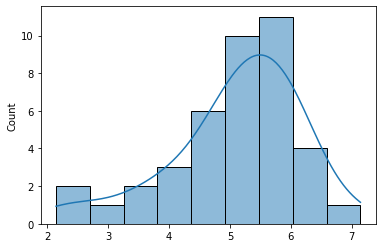

In [18]:
# в этом случае выборочное среднее оказалось несколько искаженным за счет того что одни и теже элементы участвовали в разных выборках
sns.histplot(dpn_choice.mean(axis = 1), kde = True, bins = 9)

Распределение с зависимыми выборками получилось искаженным ("тяжелый" левый хвост), вероятно из-за того, что ввыборки чаще попали значения меньше 5.
Поскольку распределение зависимых выборок будет отличатся от нормального, для статистического анализа не будет доступен надежно проработанный инструментарий, разработанный для нормально распределенных данных.

### Задание 2

Когда применяются параметрические статистические критерии, а когда — их непараметрические аналоги

Параметрические статистические критерии применяются для нормально распределенных данных, например метрики: доверительные интервалы, критерий Стьюдента для сравнения выборочных средних, критерий Хи-квадрат.<br>
Соответственно если исследуемая величина или набор выборок не следуют закону нормального распределения, то применяются непараметрические критерии, например распределения Манна-Уитни для проверки средних.

In [19]:
# проверим распределения полученные на предыдущих выборках на нормальность
from scipy.stats import shapiro

In [20]:
# распределение независымых выборок
w, p_val = shapiro(ind_choice.mean(axis = 1))
p_val

0.10122736543416977

In [21]:
# p-value выше 0,05, следовательно распределение незавимых выборок можно отнести к нормальному

# оценим распределение средних зависимых выборок
w, p_val2 = shapiro(dpn_choice.mean(axis = 1))
p_val2

0.018490014597773552

In [ ]:
# распределение зависимых выборок не прошло тест на нормальность p-vale составило 0,02 что меньше порога 0,05 Хотя предыдущее распределение выглядит несовсем идеально для нормального